In [2]:
# step 0:
#    py -m pip install seaborn
#    py -m pip install matplotlib

# import pandas
import pandas as pd # alias with a shorter name for reference
import numpy as np
from sklearn.linear_model import LinearRegression


import scipy.stats as st 


import seaborn as sns
import matplotlib.pyplot as plt

import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

Visualizing data is always the first step in an analytics project. There are two main libraries in python that are used for data visualization: matplotlib and seaborn. These packages can be used to visualize the Iris dataset.

In [3]:
# import the iris dataset
path = "/Users/avery/OneDrive/Documents/GitHub/Clinical_TLB_2023-2024/Python_for_Data_Science/Iris.csv"

iris_df = pd.read_csv(path)

Simple visualizations can be made to easily explore the distribution of each column.

Text(0.5, 1.0, 'Distribution of Petal Lengths')

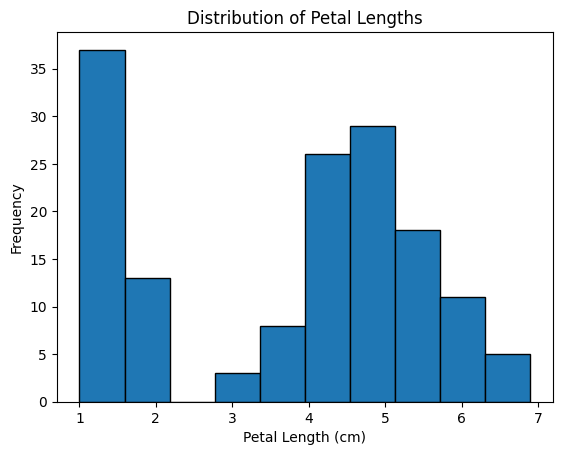

In [4]:
plt.hist(iris_df['PetalLengthCm'], edgecolor='black') 

# Adding labels and a title
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.title('Distribution of Petal Lengths')

We can look at petal length for each type like this:

array([[<Axes: title={'center': 'Iris-setosa'}>,
        <Axes: title={'center': 'Iris-versicolor'}>],
       [<Axes: title={'center': 'Iris-virginica'}>, <Axes: >]],
      dtype=object)

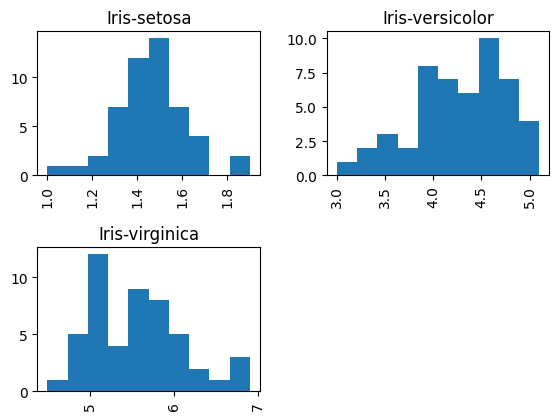

In [5]:
iris_df.hist(column='PetalLengthCm', by='Species')

Boxplots can be made by using the boxplot method.

Text(0.5, 1.0, 'Distribution of Petal Lengths')

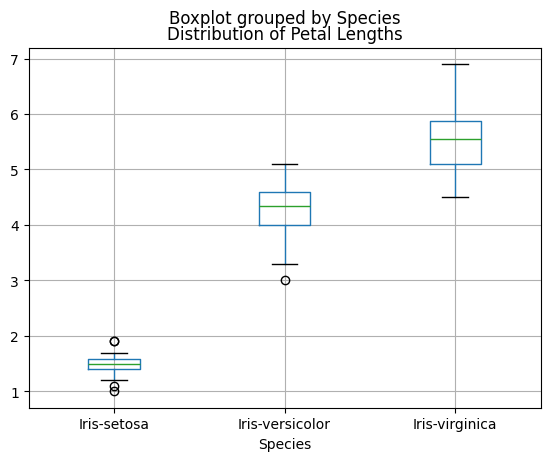

In [6]:
iris_df.boxplot(column='PetalLengthCm', by='Species')
plt.title('Distribution of Petal Lengths')

The seaborn package can also be used. Here is a scatterplot.

Text(0.5, 1.0, 'Sepal Length vs Sepal Width')

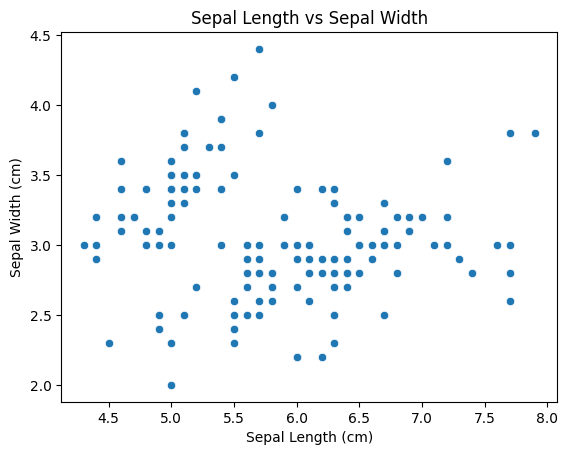

In [7]:
sns.scatterplot(data=iris_df, x='SepalLengthCm', y='SepalWidthCm')

# Adding labels and a title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')

This graph was made my using the scatter function to plot the points, and then the x/y label and title functions to label the axis and include a title. The points on the graph can be colored by the flower type by using the "hue" parameter in the scatterplot function.

Text(0.5, 1.0, 'Sepal Length vs Sepal Width')

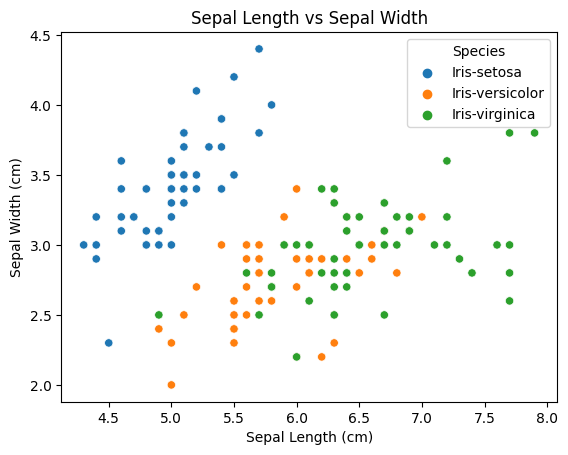

In [8]:
sns.scatterplot(data=iris_df, x='SepalLengthCm', y='SepalWidthCm', hue='Species')

# Adding labels and a title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')

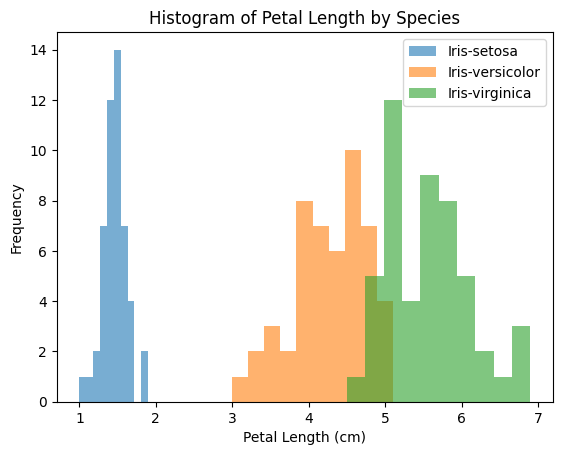

In [9]:
# Create a figure and axis
fig, ax = plt.subplots()

# create grouped df for each species type
for species, data in iris_df.groupby('Species'):

    # plot the petal length by species type
    data['PetalLengthCm'].plot(kind='hist', alpha=0.6, ax=ax, label=species)

# Adding labels and a title
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Petal Length by Species')

# Add a legend
ax.legend()

# Display the plot
plt.show()


<Axes: xlabel='PetalLengthCm', ylabel='Count'>

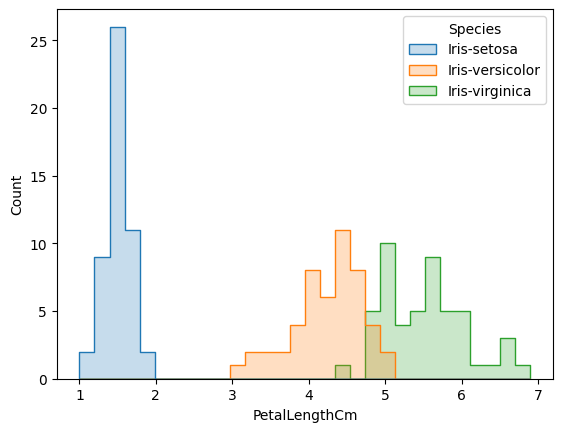

In [10]:
sns.histplot(data=iris_df, x='PetalLengthCm', hue='Species', bins=30, element='step', )

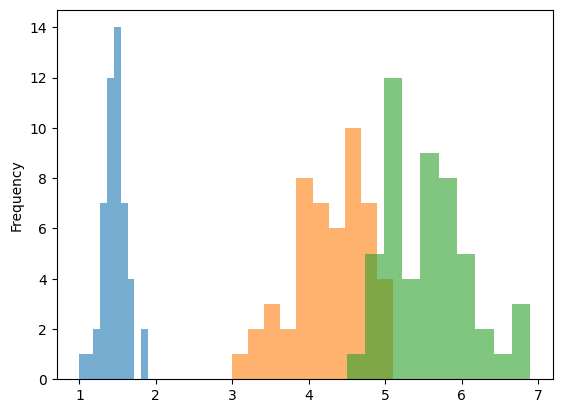

In [11]:
fig, ax = plt.subplots()

# Group the data by 'Species' and plot histograms for 'PetalLengthCm'
for species, data in iris_df.groupby('Species'):

    data['PetalLengthCm'].plot(kind='hist', alpha=0.6, ax=ax, label=species)


In [18]:
# fit a linear model to the sepal widths using sepal length to predict
df = pd.get_dummies(iris_df["Species"], drop_first=True)

X = pd.concat([df, iris_df["SepalLengthCm"]], axis=1)

y = iris_df["SepalWidthCm"]  # Dependent variable (PetalLengthCm)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

predictions = model.predict(X)


Type:        LinearRegression
String form: LinearRegression()
File:        c:\users\avery\appdata\local\programs\python\python310\lib\site-packages\sklearn\linear_model\_base.py
Docstring:  
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.

Parameters
----------
fit_intercept : bool, default=True
    Whether to calculate the intercept for this model. If set
    to False, no intercept will be used in calculations
    (i.e. data is expected to be centered).

copy_X : bool, default=True
    If True, X will be copied; else, it may be overwritten.

n_jobs : int, default=None
    The number of jobs to use for the computation. This will only provide
    speedup in case of sufficiently large problems, that is if firstly
    `n_targets > 1` and secondly `X` is sparse or if `positive` is set


Text(0.5, 1.0, 'Sepal Length vs Sepal Width')

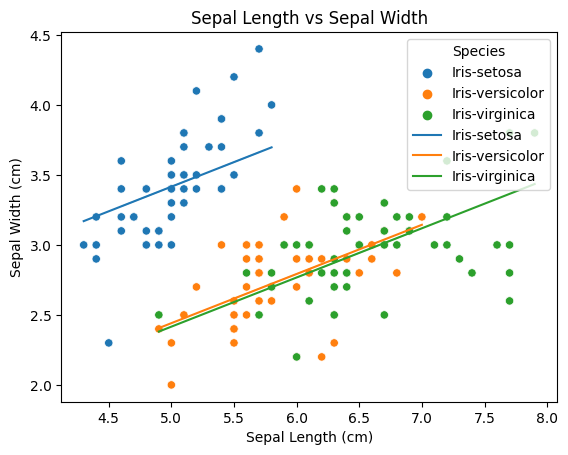

In [19]:
sns.scatterplot(data=iris_df, x='SepalLengthCm', y='SepalWidthCm', hue='Species')
sns.lineplot(data=iris_df, x='SepalLengthCm', y=predictions, hue='Species')

# Adding labels and a title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')

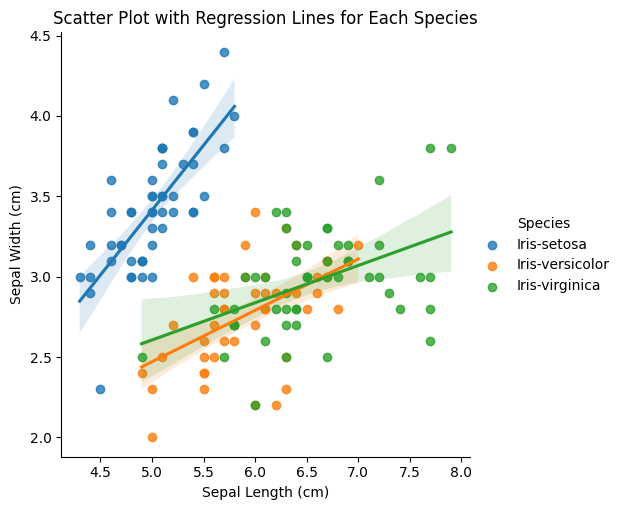

In [14]:
# Create a scatter plot with a regression line for each category (species)
sns.lmplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=iris_df)

# Customize the plot
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot with Regression Lines for Each Species')

# Show the plot
plt.show()



In [15]:
iris_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')